In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
cab = pd.read_csv('Datasets/Cab_Data.csv')
customer = pd.read_csv('Datasets/Customer_ID.csv')
transaction = pd.read_csv('Datasets/Transaction_ID.csv')
city = pd.read_csv('Datasets/City.csv')

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


## Data Merging
##### We can merge cab,transaction and city in a single dataframe abd keep city as a another dataframe

In [7]:
tran_cust = pd.merge(customer,transaction, left_on = 'Customer ID', right_on= 'Customer ID')
main_df = pd.merge(tran_cust,cab, left_on='Transaction ID', right_on='Transaction ID')

In [8]:
main_df = round(main_df,2)
main_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12


In [9]:
columns = main_df.columns.to_list()
columns

['Customer ID',
 'Gender',
 'Age',
 'Income (USD/Month)',
 'Transaction ID',
 'Payment_Mode',
 'Date of Travel',
 'Company',
 'City',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip']

In [10]:
main_df.drop(['Transaction ID'],axis=1,inplace=True)
main_df.rename(columns={'Date of Travel' : 'Date','Income (USD/Month)' :'Income'},inplace=True)
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12


In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


##### So, I have two Dataframes one containing all the information about Cab transactions and other is about Grographical information of the city.

## Prelimnary Data Analysis

In [12]:
print('The shape of Cab transaction dataframe is', main_df.shape )
print('The shape of Geographical information of city dataframe is', city.shape )

The shape of Cab transaction dataframe is (359392, 11)
The shape of Geographical information of city dataframe is (20, 3)


In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Customer ID    359392 non-null  int64  
 1   Gender         359392 non-null  object 
 2   Age            359392 non-null  int64  
 3   Income         359392 non-null  int64  
 4   Payment_Mode   359392 non-null  object 
 5   Date           359392 non-null  object 
 6   Company        359392 non-null  object 
 7   City           359392 non-null  object 
 8   KM Travelled   359392 non-null  float64
 9   Price Charged  359392 non-null  float64
 10  Cost of Trip   359392 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 32.9+ MB


In [14]:
main_df.describe()

,Customer ID,Age,Income,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190115
std,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993664
min,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.680000
max,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000


In [15]:
main_df.isnull().sum()

Customer ID      0
Gender           0
Age              0
Income           0
Payment_Mode     0
Date             0
Company          0
City             0
KM Travelled     0
Price Charged    0
Cost of Trip     0
dtype: int64

In [16]:
main_df.duplicated().sum()

0

In [17]:
main_df.nunique(axis=0)

Customer ID      46148
Gender               2
Age                 48
Income           22725
Payment_Mode         2
Date              1095
Company              2
City                19
KM Travelled       874
Price Charged    99176
Cost of Trip     14741
dtype: int64

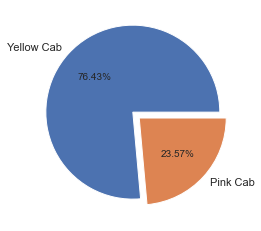

In [86]:
plt.pie(main_df['Company'].value_counts(),labels = main_df['Company'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

In [19]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
print(" Checking Null Vlaues for City")
print(city.isnull().sum())
print("\n\n Checking Duplicated Vlaues for City")
print(city.duplicated().sum())

 Checking Null Vlaues for City
City          0
Population    0
Users         0
dtype: int64


 Checking Duplicated Vlaues for City
0


In [21]:
city['Population'] = city.Population.str.replace(',', '').astype(int)
city['Users'] = city.Users.str.replace(',', '').astype(int)
city['percentage_user'] = round((city.Users/city.Population) * 100,2)

In [22]:
city.sort_values('percentage_user',ascending=False).head(10)

,City,Population,Users,percentage_user
14,SAN FRANCISCO CA,629591,213609,33.93
19,BOSTON MA,248968,80021,32.14
17,WASHINGTON DC,418859,127001,30.32
2,LOS ANGELES CA,1595037,144132,9.04
1,CHICAGO IL,1955130,164468,8.41
6,SAN DIEGO CA,959307,69995,7.30
12,SEATTLE WA,671238,25063,3.73
0,NEW YORK NY,8405837,302149,3.59
9,ATLANTA GA,814885,24701,3.03
18,NASHVILLE TN,327225,9270,2.83


##### San Francisco, Boston and Washington have the most percentage of users.

In [23]:
main_df['Price_per_km'] =  round(main_df['Cost of Trip'] / main_df['KM Travelled'],2)
main_df['day'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.day_name()
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday


In [24]:
main_df['month'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.month_name()
main_df['year'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.year
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018


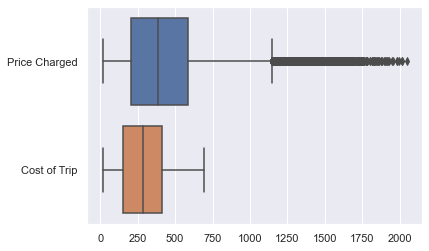

In [25]:

sns.boxplot(data = main_df[['Price Charged','Cost of Trip']], orient="h")
plt.show()

In [26]:
main_df['diff_charge_costoftrip'] = main_df['Price Charged'] -  main_df['Cost of Trip']
main_df.sort_values('diff_charge_costoftrip',ascending=False).head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,diff_charge_costoftrip
96554,1126,Male,18,8825,Cash,05/05/2017,Yellow Cab,NEW YORK NY,46.80,2048.03,584.06,12.48,Friday,May,2017,1463.97
12320,2041,Male,37,34732,Card,05/05/2017,Yellow Cab,NEW YORK NY,43.29,2016.70,571.43,13.20,Friday,May,2017,1445.27
64435,1541,Female,64,27425,Cash,30/04/2017,Yellow Cab,NEW YORK NY,43.20,2013.95,580.61,13.44,Sunday,April,2017,1433.34
250571,1372,Female,37,5574,Card,30/04/2017,Yellow Cab,NEW YORK NY,41.81,1981.05,556.91,13.32,Sunday,April,2017,1424.14
20317,207,Male,25,11149,Cash,30/04/2017,Yellow Cab,NEW YORK NY,41.65,1918.14,509.80,12.24,Sunday,April,2017,1408.34


#### Before jumping into any conclusion let's see wether holiday has any impact on pricing or demand

In [27]:
holiday = pd.read_csv('Datasets/Holiday.csv')
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     57 non-null     object
 1   Holiday  57 non-null     object
 2   WeekDay  57 non-null     object
 3   Month    57 non-null     int64 
 4   Day      57 non-null     int64 
 5   Year     57 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.8+ KB


In [28]:
main_df['holiday'] = main_df.Date.isin(holiday.Date)
main_df.holiday = main_df.holiday.astype(int)

In [29]:
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,diff_charge_costoftrip,holiday
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,57.31,0
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,281.28,0
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,194.65,0
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,23.67,0
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,253.98,0


In [30]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

<AxesSubplot:title={'center':'Number of cab rides in each month for both companies'}, xlabel='month', ylabel='count'>

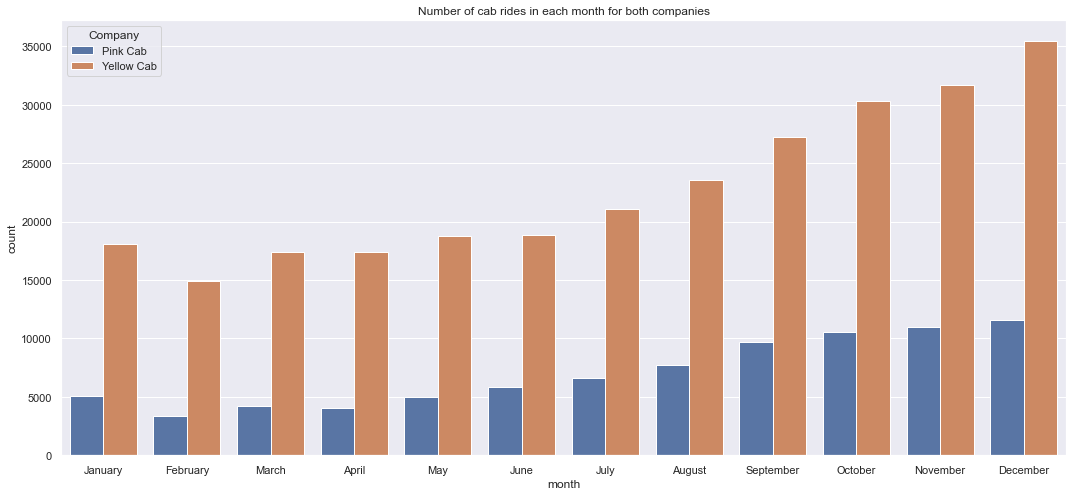

In [31]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each month for both companies')
sns.countplot(x='month',data=main_df,hue='Company',order=months)

In [32]:
PinkCab = main_df[main_df['Company']=='Pink Cab']
YellowCab = main_df[main_df['Company']=='Yellow Cab']

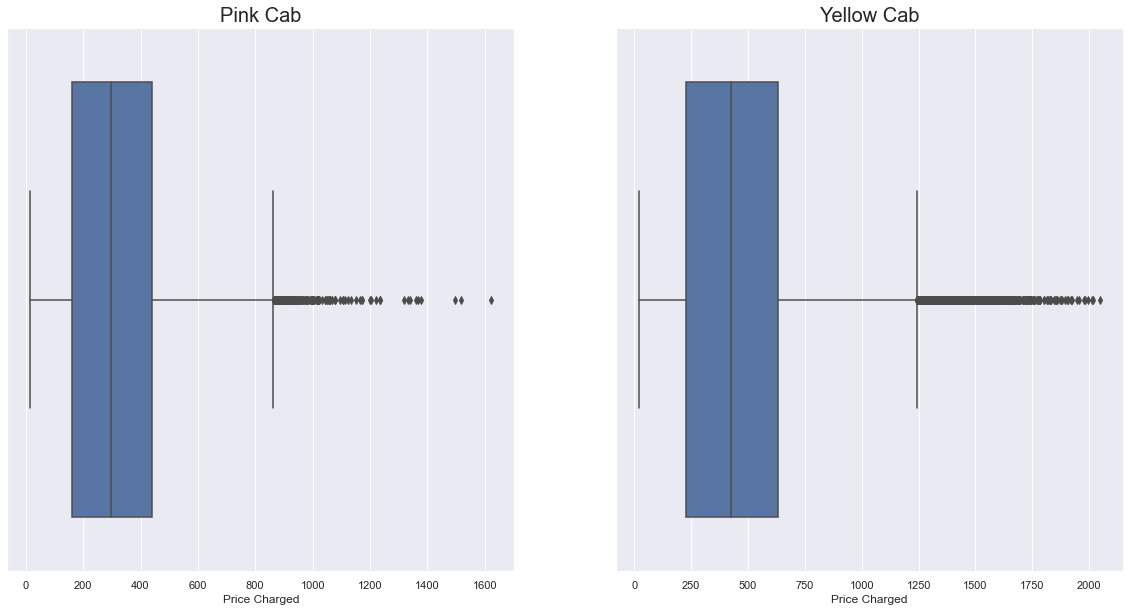

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(PinkCab['Price Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

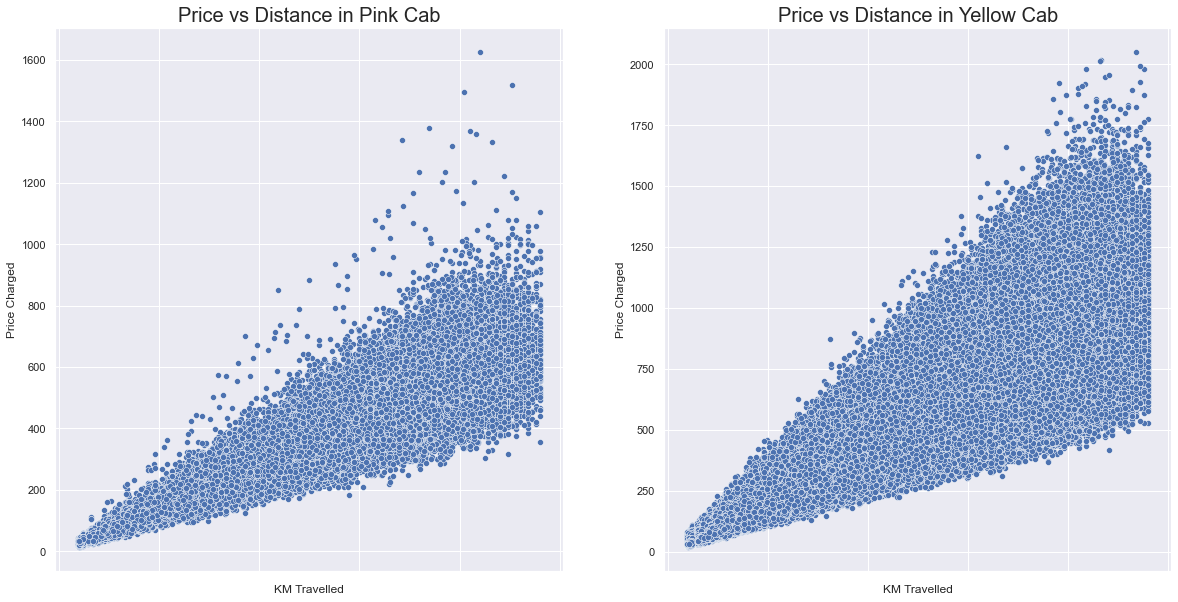

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.scatterplot(PinkCab['KM Travelled'], PinkCab['Price Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM Travelled'], YellowCab['Price Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

<AxesSubplot:title={'center':'Number of cab rides in each month for both companies'}, xlabel='month', ylabel='count'>

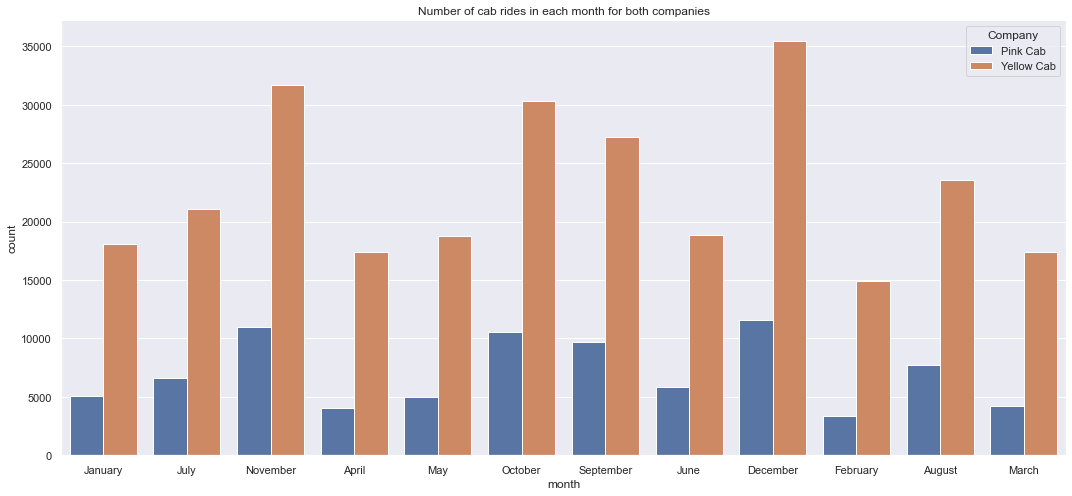

In [35]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each month for both companies')
sns.countplot(x='month',data=main_df,hue='Company')

<AxesSubplot:xlabel='year'>

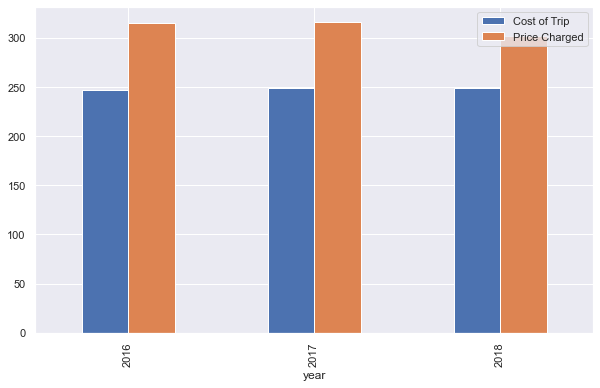

In [36]:
main_df[main_df.Company =='Pink Cab'].groupby('year')[['Price Charged','Cost of Trip']].mean().reset_index().plot(x='year',y=['Cost of Trip','Price Charged'], kind='bar',figsize=(10,6))


<AxesSubplot:xlabel='year'>

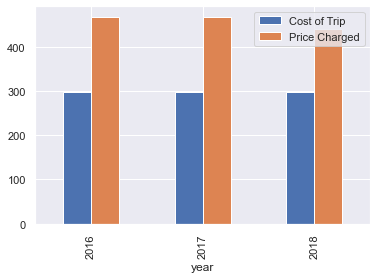

In [40]:
main_df[main_df.Company =='Yellow Cab'].groupby('year')[['Price Charged','Cost of Trip']].mean().reset_index().plot(x='year',y=['Cost of Trip','Price Charged'], kind='bar')

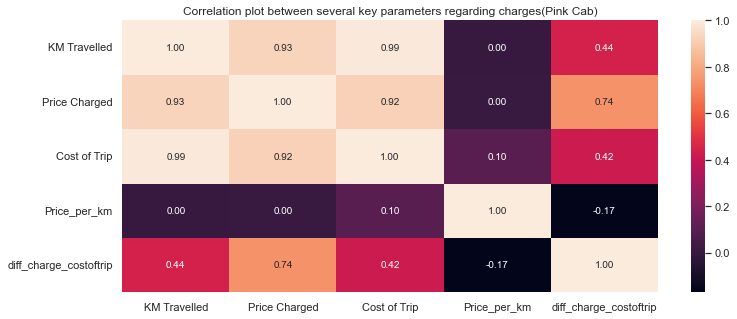

In [70]:
plt.figure(figsize=(12,5))
plt.title('Correlation plot between several key parameters regarding charges (Pink Cab)')
sns.heatmap(main_df[main_df['Company'] == 'Pink Cab'][['KM Travelled', 'Price Charged', 'Cost of Trip','Price_per_km','diff_charge_costoftrip']].corr(), annot=True,fmt='.2f')
plt.show()


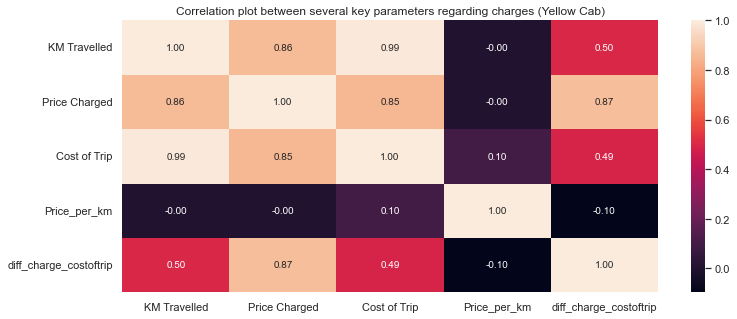

In [71]:
plt.figure(figsize=(12,5))
plt.title('Correlation plot between several key parameters regarding charges (Yellow Cab)')
sns.heatmap(main_df[main_df['Company'] == 'Yellow Cab'][['KM Travelled', 'Price Charged', 'Cost of Trip','Price_per_km','diff_charge_costoftrip']].corr(), annot=True,fmt='.2f')
plt.show()



In [82]:
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
main_df['age_range'] = pd.cut(main_df.Age, bins, labels = labels,include_lowest = True)
main_df.head()

,Customer ID,Gender,Age,Income,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,diff_charge_costoftrip,holiday,Age_range,age_range
0,29290,Male,28,10813,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,57.31,0,20-29,20-29
1,29290,Male,28,10813,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,281.28,0,20-29,20-29
2,29290,Male,28,10813,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,194.65,0,20-29,20-29
3,27703,Male,27,9237,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,23.67,0,20-29,20-29
4,27703,Male,27,9237,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,253.98,0,20-29,20-29


<AxesSubplot:title={'center':'Number of cab rides in each age range for both companies'}, xlabel='age_range', ylabel='count'>

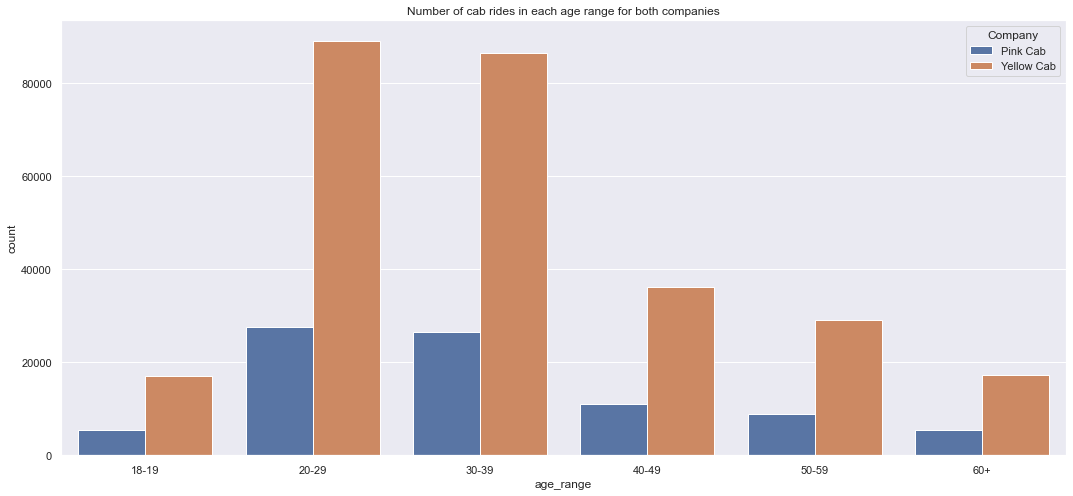

In [84]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each age range for both companies')
sns.countplot(x='age_range',data=main_df,hue='Company')

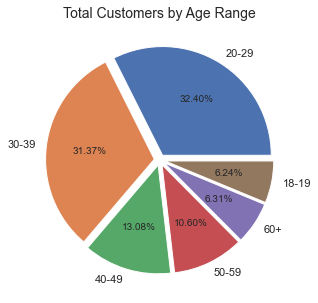

In [89]:
plt.figure(figsize=(5,5))
plt.pie(main_df['age_range'].value_counts(),labels = main_df['age_range'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*6)
plt.title("Total Customers by Age Range", fontsize=14)
plt.show()

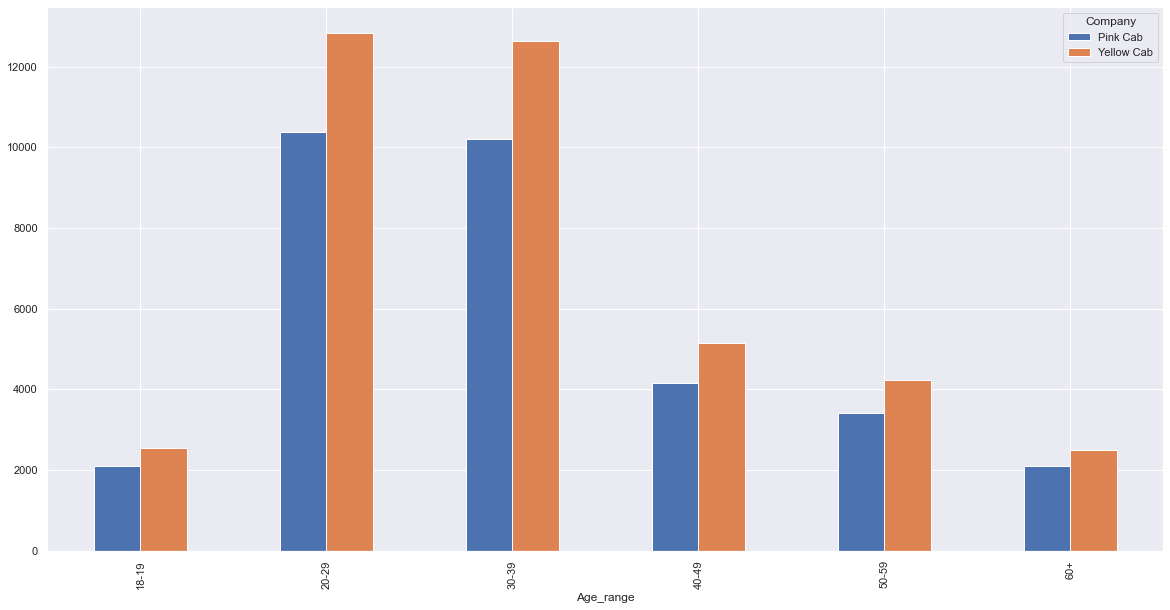

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
main_df.groupby(['Age_range', 'Company'])['Customer ID'].nunique().unstack().plot(ax=ax, kind='bar')
plt.show()

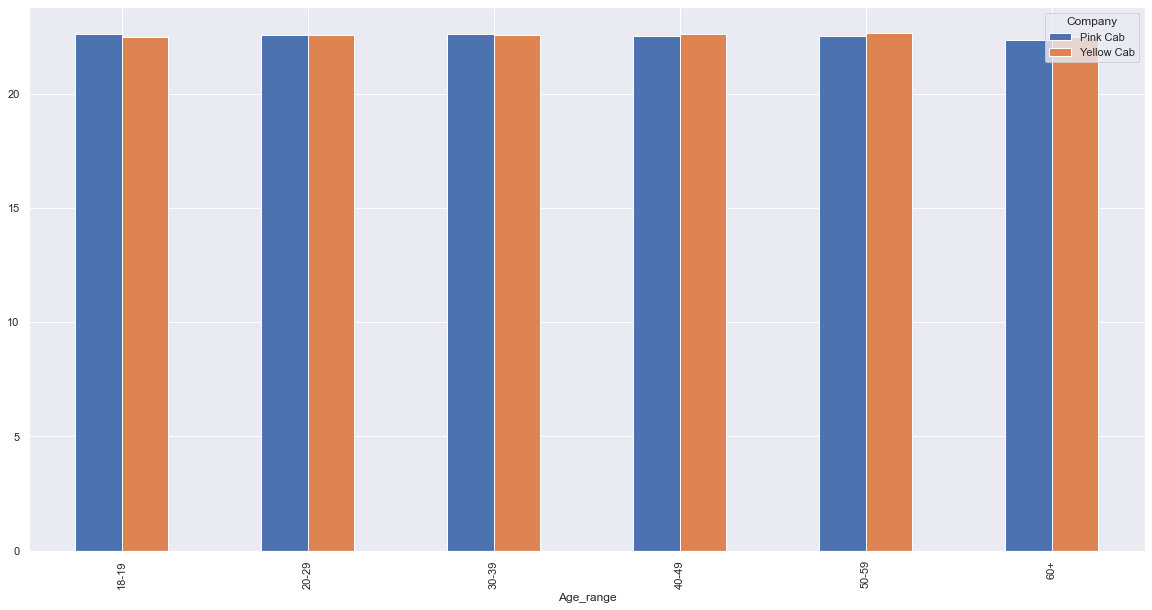

In [102]:
fig, ax = plt.subplots(figsize=(20,10))
main_df.groupby(['Age_range', 'Company'])['KM Travelled'].mean().unstack().plot(ax=ax, kind='bar')
plt.show()

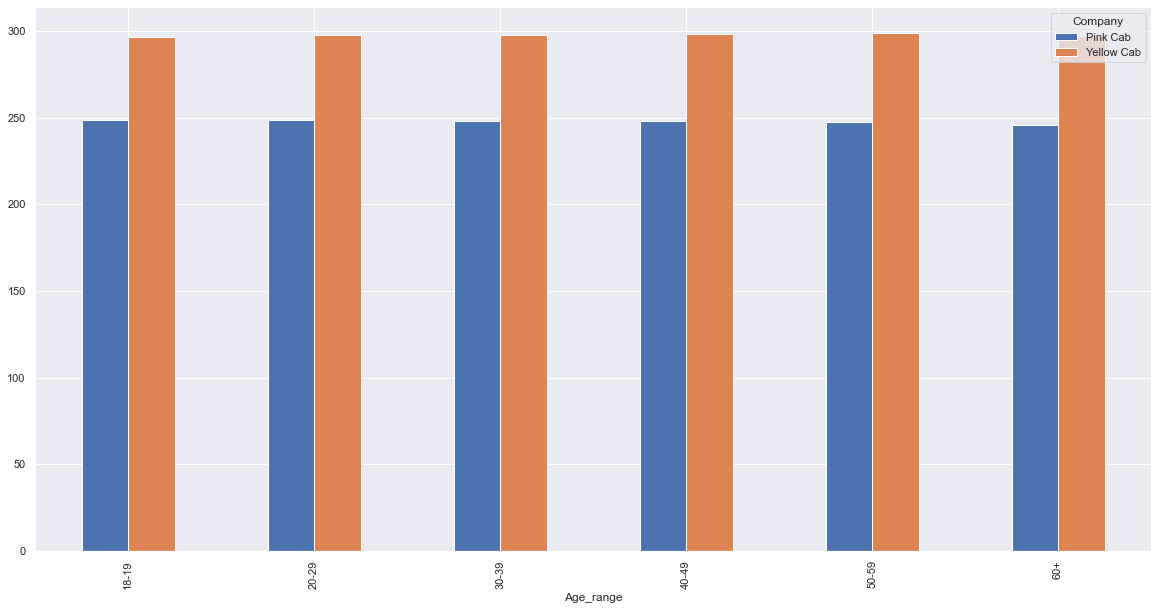

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
main_df.groupby(['Age_range', 'Company'])['Cost of Trip'].mean().unstack().plot(ax=ax, kind='bar')
plt.show()

### Price Comparison

In [109]:
main_df[main_df.holiday == 1]['Price_per_km']

41

In [80]:
3127
359392

359392